# 1. Importing Modules and Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from  sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score


In [2]:
data=pd.read_csv("C:\\Users\\STAR TOP\\.vscode\\ML_elevvo_intership\\Task _4Loan Approval Prediction Description\\loan_data.csv")
data

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved
...,...,...,...,...,...,...,...
23995,I need funds to pay for my daughter's college ...,195242,817,16403,24.32,employed,Approved
23996,I need financial assistance to launch my own Y...,150246,729,101572,9.97,employed,Rejected
23997,I need money to open a small bookstore and café.,64571,650,30533,57.35,employed,Rejected
23998,I want to buy a car for my rideshare business ...,115825,418,89837,10.37,unemployed,Rejected


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [4]:
data.shape

(24000, 7)

In [5]:
data.dtypes

Text                  object
Income                 int64
Credit_Score           int64
Loan_Amount            int64
DTI_Ratio            float64
Employment_Status     object
Approval              object
dtype: object

In [6]:
data.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


data have:24000 rows , 7 columns

and 3-->int64, 1-->float64 , 3-->object


### Checking for Missing Value

In [7]:
data.isnull().sum()

Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

No Missing value in data

### Check the duplicated value

In [8]:
data.duplicated().sum()

0

No Duplicated Value in data

# Preprocess the text data


In [9]:
def preprocess_text(Text):
    text=Text.lower()
    text=re.sub(f"[{string.punctuation}]","",text)
    stop_words=set(stopwords.words("english"))
    tokens=word_tokenize(text)
    filtered_tokens=[word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

data["clean_text"]=data["Text"].apply(preprocess_text)

In [10]:
data["clean_text"].head()

0          need loan pay international vacation family
1    want make home improvements like installing so...
2    need loan home renovation including kitchen re...
3        need funds buy new furniture appliances house
4                       need loan start small business
Name: clean_text, dtype: object

# Encode categorical variables
 

In [11]:
data["Employment_Status"]=data["Employment_Status"].replace({"unemployed":0,"employed":1}).astype(int)
data["Approval"]=data["Approval"].replace({"Rejected":0,"Approved":1}).astype(int)

In [12]:
data.dtypes

Text                  object
Income                 int64
Credit_Score           int64
Loan_Amount            int64
DTI_Ratio            float64
Employment_Status      int32
Approval               int32
clean_text            object
dtype: object

In [13]:
data["Employment_Status"].value_counts()

Employment_Status
0    12007
1    11993
Name: count, dtype: int64

In [14]:
data["Approval"].value_counts()

Approval
0    20067
1     3933
Name: count, dtype: int64

# Distribution Analysis of Employment Status and Loan Approval



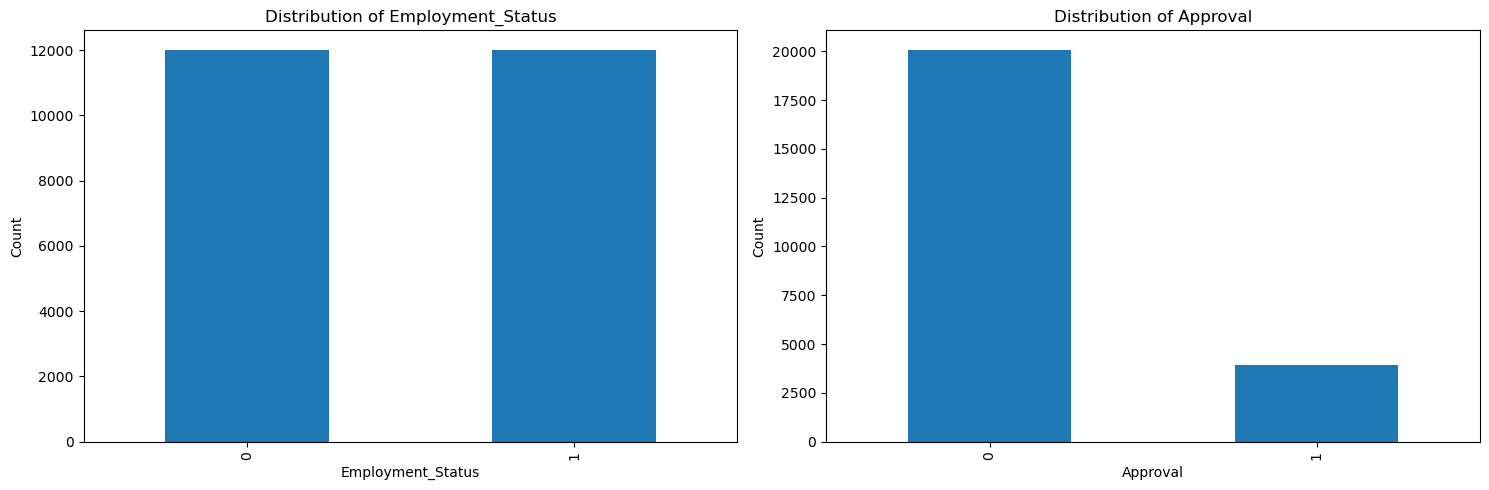

In [15]:
categorical_features = ['Employment_Status', 'Approval']

fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))

for ax, col in zip(axes, categorical_features):
    data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


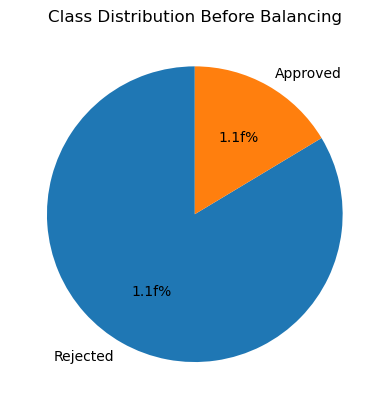

In [16]:
counts=data["Approval"].value_counts()
labels=["Rejected","Approved"]
sizes=[counts[0],counts[1]]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct="1.1f%%",startangle=90)
ax.set_title('Class Distribution Before Balancing')

plt.savefig('Class Distribution Before Balancing.png')
plt.show()

Employment_Status: The distribution appears balanced, as the counts for all categories are within a similar range (no single category dominates). 

Approval: The distribution is highly imbalanced, with one category (likely "Approved") significantly outweighing the other(s). 


## Balancing the Approval Data_Set

In [17]:
reject=data[data["Approval"]==0]
approv=data[data["Approval"]==1]

Reduce_rejected=resample(
    reject,
    replace=False,
    n_samples=len(approv),
    random_state=42
)
new_data=pd.concat([Reduce_rejected,approv])

print("\nBalanced Class Distribution :")
print(new_data["Approval"].value_counts())


Balanced Class Distribution :
Approval
0    3933
1    3933
Name: count, dtype: int64


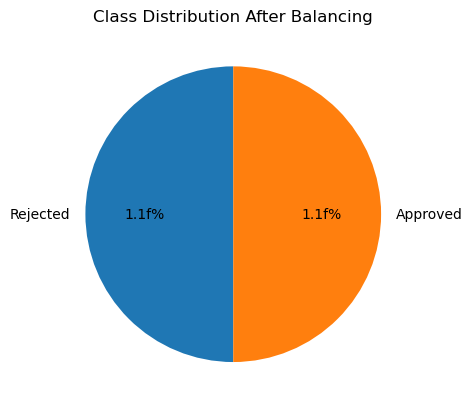

In [18]:
counts=new_data["Approval"].value_counts()
labels=["Rejected","Approved"]
sizes=[counts[0],counts[1]]

fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct="1.1f%%",startangle=90)
ax.set_title('Class Distribution After Balancing')

plt.savefig('Class Distribution After Balancing.png')
plt.show()

## feature extraction

In [19]:
vectorize=TfidfVectorizer()
x_text=vectorize.fit_transform(new_data["clean_text"]).toarray()

## Scaler for numerical data

In [20]:
scaler=StandardScaler()
structure = new_data[["Income", "Credit_Score", "Loan_Amount", "DTI_Ratio", "Employment_Status"]]
x_structur = scaler.fit_transform(structure)


In [21]:
x_combined = np.hstack((x_text, x_structur))
print(x_combined)


[[ 0.          0.          0.         ... -1.19244429  2.80739835
   0.64974301]
 [ 0.          0.          0.         ... -1.0627097   1.46571763
  -1.53907005]
 [ 0.          0.          0.         ... -1.0597117  -0.384608
   0.64974301]
 ...
 [ 0.          0.          0.         ...  1.98521675 -0.93737007
   0.64974301]
 [ 0.          0.          0.         ... -0.8046922  -0.19961251
   0.64974301]
 [ 0.          0.          0.         ... -0.84079445 -0.54291075
   0.64974301]]


# Build Model

In [22]:
x=x_combined
y=new_data["Approval"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print("Classification Report :\n", classification_report(y_test, y_pred))


Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       787
           1       0.96      0.99      0.98       787

    accuracy                           0.98      1574
   macro avg       0.98      0.98      0.98      1574
weighted avg       0.98      0.98      0.98      1574



we can notice:
* Precision and Recall are both above 0.96 for each class, showing the model’s strong ability to correctly identify both rejected and approved loans.

* The F1-Score is 0.98 for both classes, indicating a well-balanced trade-off between precision and recall.

* The overall accuracy reached 98%, highlighting the model’s effectiveness in predicting loan approval outcomes after resolving the class imbalance.


# Get Training & Test Score

In [23]:
y_train_pred=model.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

y_test_pred=model.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")



Training Accuracy: 100.00%
Testing Accuracy: 97.71%


we can see we have Overfitting in the model so we apply
Cross Validation

# Cross Validation

In [24]:
cv=cross_val_score(model,x_combined,y,cv=5,scoring="accuracy")
print("Cross-Validation Scores:", cv)
print("Mean Cross-Validation Accuracy:", cv.mean())

Cross-Validation Scores: [0.97585769 0.9726637  0.97965671 0.97202797 0.97202797]
Mean Cross-Validation Accuracy: 0.974446807668478



Cross-Validation Results:
The 5-Fold Cross-Validation accuracies range from 97.20% to 97.97%, with a mean accuracy of 97.44%.
The small variation between folds indicates that the model’s performance is stable and consistent across different subsets of the data.
Moreover, the close match between the mean cross-validation accuracy (97.44%) and the test accuracy (97.71%) suggests that overfitting is minimal, and the model generalizes well to unseen data.



#  Bonus:Apply LogisticRegression

In [26]:
model_2= LogisticRegression(max_iter=1000, random_state=42)
model_2.fit(x_train, y_train)

y_pred = model_2.predict(x_test)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       787
           1       0.91      0.95      0.93       787

    accuracy                           0.93      1574
   macro avg       0.93      0.93      0.93      1574
weighted avg       0.93      0.93      0.93      1574



In [27]:
y_train_pred=model_2.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

y_test_pred=model_2.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 92.24%
Testing Accuracy: 92.82%


Logistic Regression demonstrated strong and balanced performance, achieving close accuracy across training and test data with minimal overlap, demonstrating no overfitting issues and good generalization.

# Bonus:Apply Decision_tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

model_3= DecisionTreeClassifier(random_state=42)
model_3.fit(x_train, y_train)

y_pred = model_3.predict(x_test)
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred))


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       787
           1       0.99      0.99      0.99       787

    accuracy                           0.99      1574
   macro avg       0.99      0.99      0.99      1574
weighted avg       0.99      0.99      0.99      1574



In [29]:
y_train_pred=model_3.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

y_test_pred=model_3.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 99.17%


we can see same problem in RandomForest so we can try cross validaition for Decision tree

In [30]:
cv=cross_val_score(model_3,x_combined,y,cv=5,scoring="accuracy")
print("Cross-Validation Scores:", cv)
print("Mean Cross-Validation Accuracy:", cv.mean())

Cross-Validation Scores: [0.98919949 0.9885569  0.99173554 0.99300699 0.99109981]
Mean Cross-Validation Accuracy: 0.9907197457734596


The Decision Tree model achieved extremely high accuracy (~99%) with consistent cross-validation results, indicating strong performance but with a potential risk of overfitting


Comparison of Models:
The Decision Tree achieved the highest mean cross-validation accuracy (~99.07%), followed by Random Forest (~97.44%), and Logistic Regression (~93% test accuracy). While Decision Tree and Random Forest show excellent performance, their very high training accuracy suggests a risk of overfitting, unlike Logistic Regression which maintained a more balanced generalization.

